# Booking.com Hotel Review NLP

Features by relationship

Hotel
- address
- hotel name
- lat
- long
- total_number_of_reviews
- additional_number_of_scoring
- average_score

reviewer
- review_nationality
- total_number_of_reviews_reviewer_has_given
- reviewer_score
- tags

review
- negative_review
- review_total_negative_word_counts
- negative_unique_word_count
- positive_review
- review_total_postive_word_counts
- positive_uniqu_word_count
- days_since_review

date
- month
- year
- day_name
- day
- quarter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import wrangle

pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

plt.rc('figure', figsize=(20,10))

# Acquire

- How do we aquire this from the webpage programatically?

In [2]:
hotel = wrangle.wrangle_hotel()

Using cached csv file...


In [3]:
#hotel = pd.read_csv('Hotel_Reviews.csv')

In [4]:
#hotel = hotel.set_index('Review_Date')

In [5]:
#hotel = hotel.reset_index()

In [6]:
#hotel.head()

In [7]:
#hotel = wrangle.nlp_clean(hotel)

# Wrangle

### Wrangle Function

In [8]:
# def wrangle_hotel(df):
#     '''
#     Wrangle Start
#     '''
    
#     # lower case column names
#     df.columns = [col.lower() for col in df]
    
#     # Set the review date as a datetime object then set it as the index
#     df.review_date = pd.to_datetime(df.review_date)
#     df = df.set_index('review_date').sort_index()
    
#     # Create columns for date types to groupby
#     df['month'] = df.index.month_name()
#     df['year'] = df.index.year
#     df['day_name'] = df.index.day_name()
#     df['day'] = df.index.day
#     df['quarter'] = df.index.quarter
    
#     # Unique word counts for positive and negative reviews
#     df['negative_unique_word_count'] = [len(set(nr.split())) for nr in df.negative_review]
#     df['positive_unique_word_count'] = [len(set(pr.split())) for pr in df.positive_review]
    
#     # remove day string and make int type
#     df.days_since_review = [row.split()[0] for row in df.days_since_review]
#     df.days_since_review = df.days_since_review.astype('int')
    
#     street = []
#     city = []
#     zip_code = []
#     country = []

#     for address in hotel.hotel_address:

#         if address.split()[-1] in ['France','Netherlands','Italy']:

#             street.append(' '.join(address.split()[:-4]))
#             zip_code.append(' '.join(address.split()[-4:-2]))
#             city.append(' '.join(address.split()[-2:-1]))
#             country.append(' '.join(address.split()[-1:]))

#         elif address.split()[-1] in ['Spain','Austria']:

#             street.append(' '.join(address.split()[:-3]))
#             zip_code.append(' '.join(address.split()[-3:-2]))
#             city.append(' '.join(address.split()[-2:-1]))
#             country.append(' '.join(address.split()[-1:]))

#         else:
#             if address.split()[-6]
#             street.append(' '.join(address.split()[:-5]))
#             city.append(' '.join(address.split()[-5:-4]))
#             zip_code.append(' '.join(address.split()[-4:-2]))
#             country.append(' '.join(address.split()[-2:]))

#     hotel['street'] = street
#     hotel['city'] = city
#     hotel['zip_code'] = zip_code
#     hotel['country'] = country
    
#     # Break out tags into groups
#     df.tags = [[tag.strip().lower() for tag in (tags.replace('"','').replace("'","")
#                                      .replace('[','') .replace(']','')
#                                      .split(','))] for tags in df.tags]
    
#     return df

In [9]:
# lower case column names
# hotel.columns = [col.lower() for col in hotel]

In [10]:
# # Set the review date as a datetime object then set it as the index
# hotel.review_date = pd.to_datetime(hotel.review_date)
# hotel = hotel.set_index('review_date').sort_index()
# # Create columns for date types to groupby
# hotel['month'] = hotel.index.month_name()
# hotel['year'] = hotel.index.year
# hotel['day_name'] = hotel.index.day_name()
# hotel['day'] = hotel.index.day
# hotel['quarter'] = hotel.index.quarter

In [11]:
# # Unique word count for first row
# #len(set(hotel.negative_review[0].split()))

# # Unique word counts for positive and negative reviews
# hotel['negative_unique_word_count'] = [len(set(nr.split())) for nr in hotel.negative_review]
# hotel['positive_unique_word_count'] = [len(set(pr.split())) for pr in hotel.positive_review]

In [12]:
# # remove day string and make int type
# hotel.days_since_review = [row.split()[0] for row in hotel.days_since_review]
# hotel.days_since_review = hotel.days_since_review.astype('int')

In [13]:
# # Get Hotel Location
# hotel['location'] = [' '.join(col.split()[-2:]) for col in hotel.hotel_address]

In [14]:
# # Break out tags into groups
# hotel.tags = [[tag.strip().lower() for tag in (tags.replace('"','').replace("'","")
#                                      .replace('[','') .replace(']','')
#                                      .split(','))] for tags in hotel.tags]

In [15]:
# street = []
# city = []
# zip_code = []
# country = []

# for address in hotel.hotel_address:
    
#     if address.split()[-1] in ['France','Netherlands','Italy']:
        
#         street.append(' '.join(address.split()[:-4]))
#         zip_code.append(' '.join(address.split()[-4:-2]))
#         city.append(' '.join(address.split()[-2:-1]))
#         country.append(' '.join(address.split()[-1:]))
    
#     elif address.split()[-1] in ['Spain','Austria']:
        
#         street.append(' '.join(address.split()[:-3]))
#         zip_code.append(' '.join(address.split()[-3:-2]))
#         city.append(' '.join(address.split()[-2:-1]))
#         country.append(' '.join(address.split()[-1:]))
    
#     else:
#         if address.split()[-6]
#         street.append(' '.join(address.split()[:-5]))
#         city.append(' '.join(address.split()[-5:-4]))
#         zip_code.append(' '.join(address.split()[-4:-2]))
#         country.append(' '.join(address.split()[-2:]))

# hotel['street'] = street
# hotel['city'] = city
# hotel['zip_code'] = zip_code
# hotel['country'] = country

### Address

In [16]:
# We need to figure out a way to seperate out the address in to its parts.
# Street Address
# City
# Zip
# Country
# hotel.hotel_address.value_counts()

In [17]:
# [len(hotel) for hotel in hotel.hotel_address]

In [18]:
## Breakup into 5 Stages
# 399 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('United Kingdom')])#.hotel_address.value_counts().size

## Breakup into four stages
# 105 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('Netherlands')])#.hotel_address.value_counts().size
# 458 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('France')]).hotel_address.value_counts().size

# 211 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('Spain')])#.hotel_address.value_counts().size
# 158 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('Austria')]).hotel_address.value_counts().size
# 162 Addresses
# pd.DataFrame(hotel.hotel_address[hotel.hotel_address.str.endswith('Italy')]).hotel_address.value_counts().size

In [19]:
#[col.split()[-6:] for col in hotel.hotel_address]

In [20]:
# hotel.hotel_address[hotel.hotel_address.str.endswith('Austria')]

In [21]:
# hotel[['city']].value_counts().sort_index()

In [22]:
#pd.DataFrame([bourough.split()[:-4] for bourough in hotel.hotel_address[hotel.city == 'London']]).value_counts(dropna=False)

In [23]:
# pd.DataFrame([bourough.split()[:-5] for bourough in hotel.hotel_address[hotel.city == 'Barcelona']]).value_counts()

In [24]:
# pd.DataFrame([bourough.split()[:-5] for bourough in hotel.hotel_address[hotel.city == 'Paris']]).value_counts()

In [25]:
# pd.DataFrame([bourough.split()[:-5] for bourough in hotel.hotel_address[hotel.city == 'Amsterdam']]).value_counts()

In [26]:
# pd.DataFrame([bourough.split()[:-5] for bourough in hotel.hotel_address[hotel.city == 'Vienna']]).value_counts()

In [27]:
# pd.DataFrame([bourough.split()[:-5] for bourough in hotel.hotel_address[hotel.city == 'Milan']]).value_counts()

In [28]:
# hotel[['city','zip_code']].value_counts().sort_index()

In [29]:
# pd.DataFrame([zip_code.split()[0] for zip_code in london.zip_code]).value_counts().sort_index()

In [30]:
# london.district.value_counts()

<AxesSubplot:xlabel='lat', ylabel='lng'>

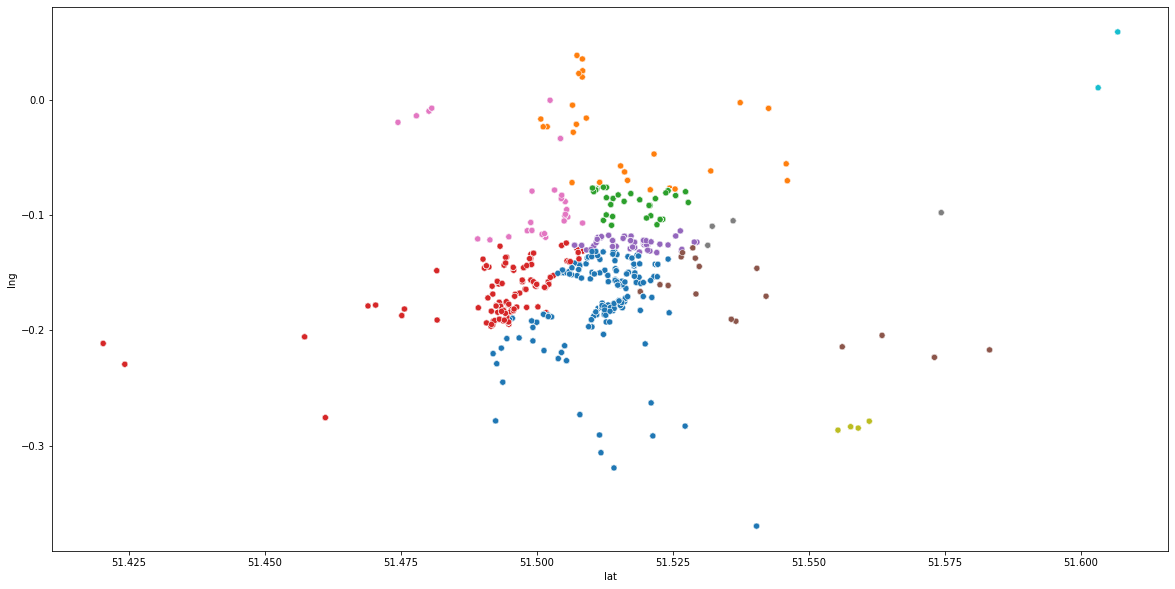

In [95]:
sns.scatterplot(x='lat',y='lng',hue='district',legend=False,data=london)

### Review Lengths

In [32]:
# Length of negative review
# len(hotel.negative_review[0].split())

In [33]:
# Given length of negative review seems wrong and should be investigated further
# hotel.review_total_negative_word_counts[0]

### Tags

In [34]:
# pd.Series([len(tags.split(',')) for tags in hotel.tags]).value_counts().sort_index()

In [35]:
# hotel.tags[0][0]

In [36]:
#[tags for tags in hotel.tags]

In [37]:
# [tag[1] for tag in hotel.tags if len(tag) == 6]
# len([tag for tag in hotel.tags if len(tag) == 5])
# len([tag for tag in hotel.tags if len(tag) == 4])
# len([tag for tag in hotel.tags if len(tag) == 3])
# len([tag for tag in hotel.tags if len(tag) == 2])
# len([tag for tag in hotel.tags if len(tag) == 1])

## Mising Values

In [38]:
# print nulls per row
# [print(f'{col}:{hotel[col].isnull().sum()}') for col in  hotel.columns] # How to format better

### No valid review

In [39]:
# hotel.negative_review[2]

In [40]:
# (hotel.positive_review == 'No Positive').mean()

In [41]:
# (hotel.positive_review == ' Nothing').mean()

In [42]:
# (hotel.negative_review == 'No Negative').mean()

In [43]:
# (hotel.negative_review == ' Nothing').mean()

In [44]:
# Unique Values per column
# for col in hotel.columns:
#     print(f'{col} Counts:{hotel[col].nunique()}')

## Continents

In [45]:
from requests import get
from bs4 import BeautifulSoup
from itertools import zip_longest
from more_itertools import grouper
url = 'https://statisticstimes.com/geography/countries-by-continents.php'
response = get(url)
soup = BeautifulSoup(response.content, 'html.parser')
list_of_countries = soup.select('tbody')[1]
list_of_countries = list_of_countries.select('.name')
list_of_countries = [name.text for name in list_of_countries]
new_list = []
for name in grouper(4, list_of_countries, fillvalue=None):
    new_list.append(name)
country_continent = pd.DataFrame()
country_continent['country'] = [name[0] for name in new_list]
country_continent['sub_region'] = [name[1] for name in new_list]
country_continent['continent'] = [name[3] for name in new_list]

In [114]:
country_continent.country[country_continent.country == 'United Kingdom of Great Britain and Northern Ireland']

234    United Kingdom of Great Britain and Northern Ireland
Name: country, dtype: object

# Explore (London)

In [47]:
london = hotel[hotel.country == 'United Kingdom']

In [48]:
london['district'] = [re.match(r'\D\D?', zcode)[0] for zcode in london.zip_code]

In [49]:
london.nights_stayed = pd.to_numeric(london.nights_stayed)

In [50]:
london.reviewer_nationality = [rnat.strip() for rnat in london.reviewer_nationality]

In [51]:
london = london.merge(country_continent, how='left', left_on='reviewer_nationality', right_on='country')

In [52]:
#london.head(1)

In [53]:
#london.info()

## Univariate

In [54]:
# london.describe()

In [55]:
# object_types = ['month', 'day_name', 'hotel_name', 'street', 'city', 'zip_code',
#        'country', 'reviewer_nationality', 'trip_type', 'group_type']
# i = 0

# for col in ((london.columns[london.dtypes == 'float']) | (london.columns[london.dtypes == 'int']) | object_types):
#     print(col)
#     sns.countplot(london[col])
#     plt.show()

In [56]:
# sns.heatmap(london.corr(),annot=True, cmap='coolwarm')
# plt.show()

In [57]:
# sns.pairplot(london)
# plt.show()

# Questions to ask

## For Hotel

Distribution of tags/customers (how many had a pet, avg length of stay, etc)

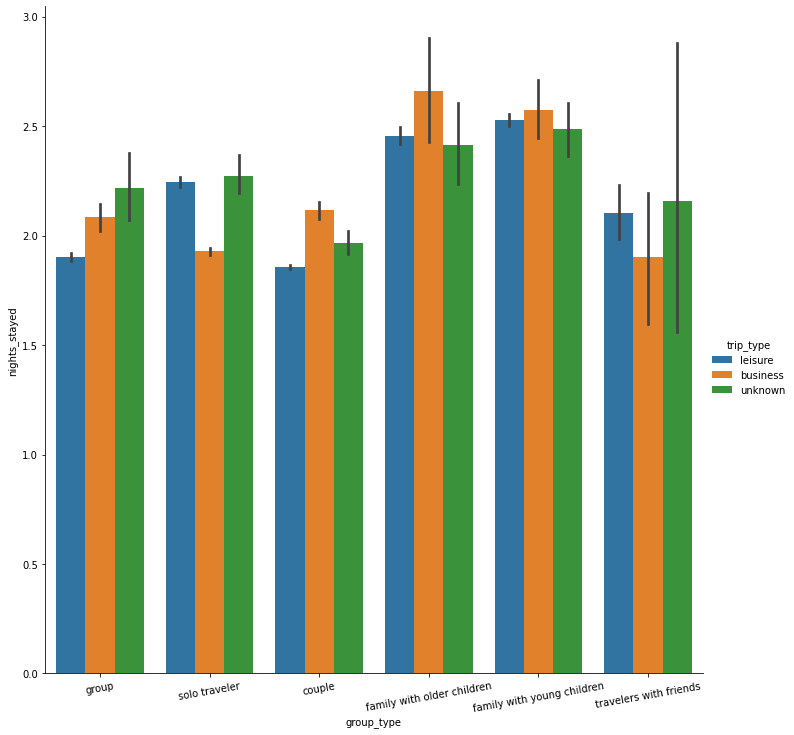

In [58]:
sns.catplot(x='group_type', y='nights_stayed', hue= 'trip_type', data=london, kind='bar',height=10)
plt.xticks(rotation=10)
plt.show()

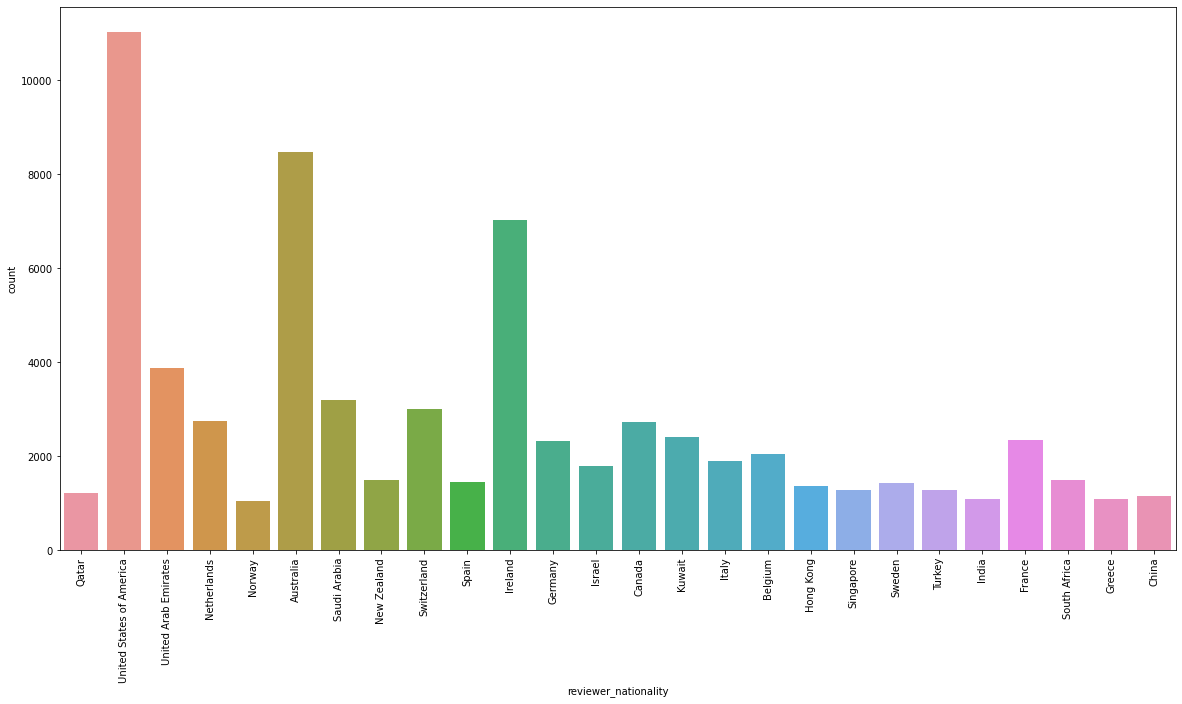

In [59]:
thousand_reviews = london.reviewer_nationality.value_counts()[london.reviewer_nationality.value_counts() > 1000].index[1:]
thousand_reviews_data = london.reviewer_nationality[london.reviewer_nationality.isin(thousand_reviews)]
ax = sns.countplot(thousand_reviews_data)
ax = plt.xticks(rotation=90)

Scores by hotel (mean, count by bins, etc)

<AxesSubplot:ylabel='district'>

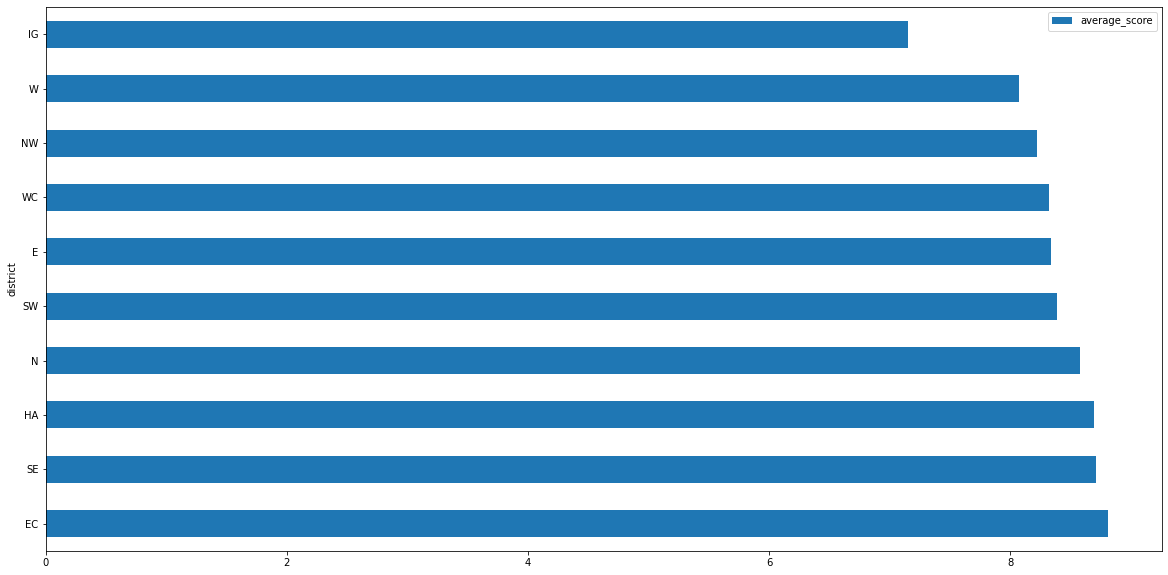

In [60]:
(london[['district','average_score']]
 .groupby('district')
 .mean()
 .sort_values(['average_score'],ascending=False)).plot.barh()

In [61]:
(london[['hotel_name','average_score']]
 .groupby('hotel_name')
 .mean()
 .sort_values(['average_score'],ascending=False)).head(5)

,average_score
hotel_name,
Haymarket Hotel,9.6
41,9.6
Charlotte Street Hotel,9.5
Taj 51 Buckingham Gate Suites and Residences,9.5
Ham Yard Hotel,9.5


In [62]:
(london[['hotel_name','district','average_score']]
 .groupby('hotel_name')
 .mean()
 .sort_values(['average_score'],ascending=False)).tail(5)

,average_score
hotel_name,
Bloomsbury Palace Hotel,6.8
Commodore Hotel,6.7
The Tophams Hotel,6.6
Best Western Maitrise Hotel Edgware Road,6.6
Hotel Cavendish,6.4


## For Reviewer

Does a reviewer nationality affect the score given?

In [63]:
(london[['reviewer_nationality','average_score']]
 .groupby('reviewer_nationality')
 .mean()
 .sort_values(['average_score'],ascending=False)).tail(5)

,average_score
reviewer_nationality,
Cura ao,7.60
Gambia,7.45
Afghanistan,7.05
New Caledonia,7.00
Kiribati,6.70


In [64]:
(london[['reviewer_nationality','average_score']]
 .groupby('reviewer_nationality')
 .mean()
 .sort_values(['average_score'],ascending=False)).head(5)

,average_score
reviewer_nationality,
Swaziland,9.25
Gabon,9.20
Saint Martin,9.10
Laos,9.10
Cape Verde,9.00


Does the total amount of reviews affect the review score?

<AxesSubplot:xlabel='reviewer_score', ylabel='total_number_of_reviews'>

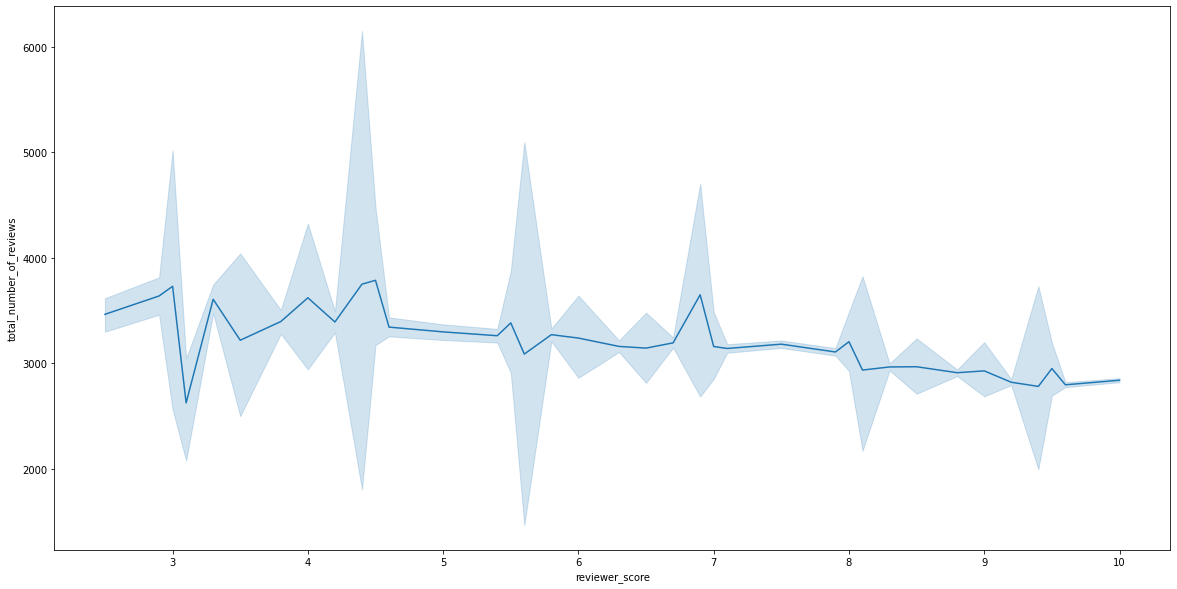

In [65]:
sns.lineplot(x='reviewer_score',y='total_number_of_reviews',data=london)

Do the tags determine the reviewer score or nationality? (i.e. does certain words attract certain guests?)

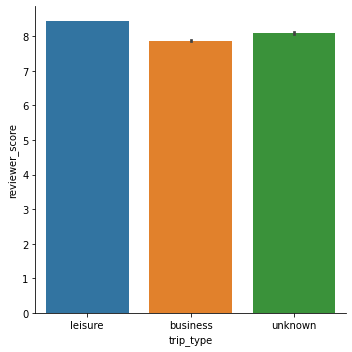

In [66]:
sns.catplot(y='reviewer_score',x='trip_type',data=london,kind='bar')

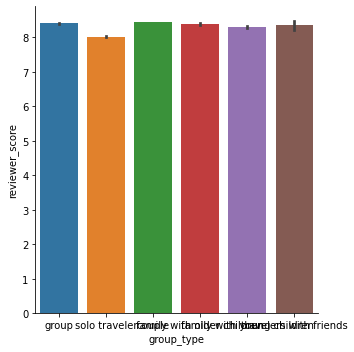

In [67]:
sns.catplot(y='reviewer_score', x='group_type', data=london,kind='bar')

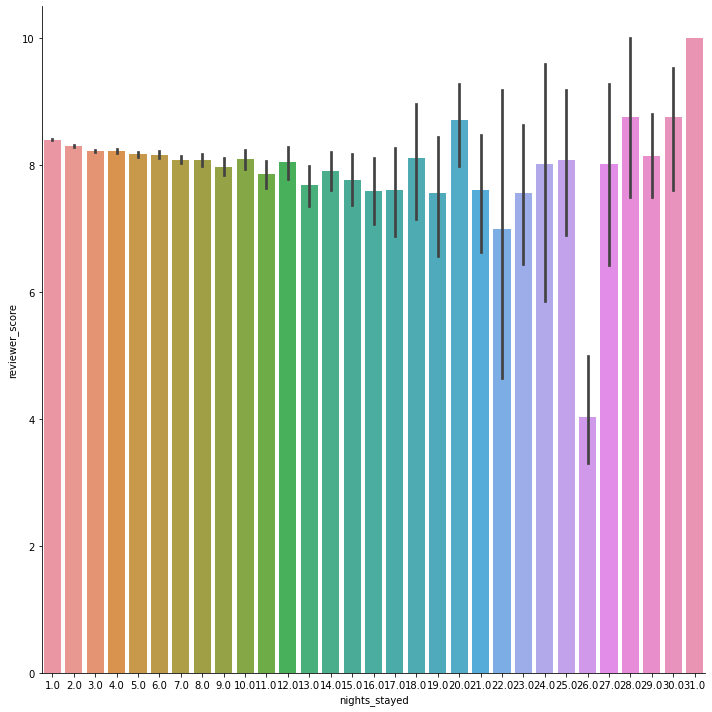

In [68]:
sns.catplot(x='nights_stayed',y='reviewer_score',data=london,kind='bar',height=10)

In [69]:
london.nights_stayed.value_counts()

1.0     134721
2.0      65135
3.0      30506
4.0      14170
5.0       7017
6.0       3958
7.0       2980
8.0       1348
9.0        724
10.0       581
11.0       264
12.0       208
13.0       169
14.0       154
15.0        76
16.0        45
17.0        31
18.0        21
19.0        19
21.0        18
20.0        16
23.0         9
30.0         9
24.0         5
25.0         5
22.0         5
27.0         5
26.0         3
29.0         2
28.0         2
31.0         1
Name: nights_stayed, dtype: int64

What is the distribution of the customer's home country?

In [70]:
london.reviewer_nationality.value_counts().head(30)

United Kingdom              170649
United States of America     11011
Australia                     8473
Ireland                       7020
United Arab Emirates          3864
Saudi Arabia                  3202
Switzerland                   2992
Netherlands                   2737
Canada                        2718
Kuwait                        2397
France                        2352
Germany                       2329
Belgium                       2035
Italy                         1891
Israel                        1798
South Africa                  1496
New Zealand                   1483
Spain                         1445
Sweden                        1432
Hong Kong                     1365
Singapore                     1284
Turkey                        1276
Qatar                         1212
China                         1146
Greece                        1093
India                         1080
Norway                        1045
Malaysia                       848
Russia              

In [71]:
london.reviewer_nationality.value_counts().size

199

## For Review

What words are commonly associated with negative and positive reviews?

In [72]:
london.negative_lemma.value_counts().head(30)

nothing                11086
n                       1109
room small              1032
small room               725
none                     619
nothing like             564
good                     498
complaint                357
nothing really           355
nothing dislike          327
price                    294
breakfast                279
everything               252
room bit small           213
expensive                207
size room                203
liked everything         201
breakfast expensive      197
nothing good             196
location                 193
leave                    173
think anything           168
room little small        165
na                       155
leaving                  153
nothing complain         152
nil                      141
nothing perfect          139
everything perfect       137
room size                132
Name: negative_lemma, dtype: int64

In [73]:
london.positive_lemma.value_counts().head(30)

location                   7900
everything                 1777
nothing                     972
good location               951
great location              936
location good               618
friendly staff              598
breakfast                   549
location staff              511
location great              485
bed comfortable             481
staff                       465
bed comfy                   456
location excellent          415
staff friendly              413
staff friendly helpful      402
comfy bed                   382
staff helpful               362
excellent location          356
breakfast good              302
comfortable bed             300
friendly helpful staff      268
clean                       245
location perfect            240
staff excellent             216
good                        215
location friendly staff     204
helpful staff               196
good breakfast              183
location breakfast          180
Name: positive_lemma, dtype: int64

Does the length of a review determine if it is negative or positive?

In [74]:
london.review_total_negative_word_counts.value_counts().head().sort_values(ascending=False)

0    60219
2    12105
3     9307
6     9088
5     8672
Name: review_total_negative_word_counts, dtype: int64

In [75]:
london.negative_unique_word_count.value_counts().head().sort_values(ascending=False)

2    68625
1    14436
5     9639
4     9285
3     8687
Name: negative_unique_word_count, dtype: int64

In [76]:
london.review_total_positive_word_counts.value_counts().head().sort_values(ascending=False)

0    19632
6    14311
5    14230
4    13190
7    12970
Name: review_total_positive_word_counts, dtype: int64

In [77]:
london.positive_unique_word_count.value_counts().head()

2    32981
4    15747
5    15225
6    14075
3    13993
Name: positive_unique_word_count, dtype: int64

What is the seasonality in each region? 

In [78]:
london.groupby('month').reviewer_score.mean()

month
1     8.445929
2     8.460017
3     8.421435
4     8.423699
5     8.343209
6     8.331424
7     8.177466
8     8.336723
9     8.184817
10    8.201297
11    8.233427
12    8.294419
Name: reviewer_score, dtype: float64

In [79]:
london.groupby('quarter').reviewer_score.mean()

quarter
1    8.442401
2    8.366023
3    8.237920
4    8.243881
Name: reviewer_score, dtype: float64

In [80]:
london.groupby('day_name').reviewer_score.mean()

day_name
Friday       8.255598
Monday       8.341606
Saturday     8.254028
Sunday       8.330987
Thursday     8.226061
Tuesday      8.403856
Wednesday    8.341998
Name: reviewer_score, dtype: float64

- Customer Nationality? 

In [81]:
london.groupby('reviewer_nationality').size().sort_values(ascending=False).head(11)

reviewer_nationality
United Kingdom              170649
United States of America     11011
Australia                     8473
Ireland                       7020
United Arab Emirates          3864
Saudi Arabia                  3202
Switzerland                   2992
Netherlands                   2737
Canada                        2718
Kuwait                        2397
France                        2352
dtype: int64

In [82]:
london[london.reviewer_nationality == 'United Kingdom'].groupby('month').size().sort_values()

month
9     11485
11    12879
10    13209
6     13253
7     13316
8     14601
4     14639
5     14869
12    15412
1     15525
3     15525
2     15936
dtype: int64

In [83]:
london[london.reviewer_nationality == 'United States of America'].groupby('month').size().sort_values()

month
2      411
11     604
12     606
3      652
1      684
4      747
10    1057
9     1100
5     1168
8     1260
6     1308
7     1414
dtype: int64

In [84]:
london[london.reviewer_nationality == 'Australia'].groupby('month').size().sort_values()

month
3      253
2      259
11     398
12     448
4      474
1      618
5      799
10     856
6      968
9     1089
7     1147
8     1164
dtype: int64

In [85]:
london[london.reviewer_nationality == 'Ireland'].groupby('month').size().sort_values()

month
9     426
6     476
7     509
10    510
12    534
11    571
8     602
5     603
4     620
1     649
2     734
3     786
dtype: int64

In [86]:
london[london.reviewer_nationality == 'United Arab Emirates'].groupby('month').size().sort_values()

month
11    191
2     207
6     209
3     225
5     309
10    311
9     346
1     362
12    367
4     376
7     387
8     574
dtype: int64

<AxesSubplot:xlabel='month'>

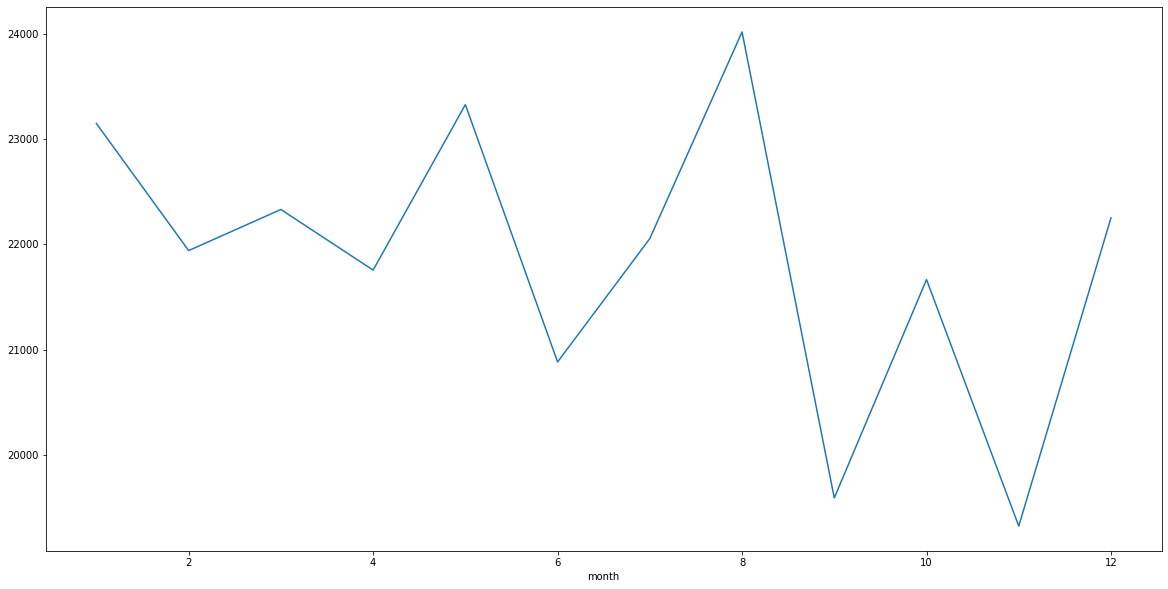

In [87]:
london.groupby(london.month).reviewer_nationality.size().plot()

In [88]:
top_ten = london[london.reviewer_nationality.isin(['United States of America', 'Australia', 'Ireland',
       'United Arab Emirates', 'Saudi Arabia', 'Switzerland', 'Netherlands',
       'Canada', 'Kuwait','France'])].groupby(['reviewer_nationality','month']).size().sort_values(ascending=False)
top_ten.head()

reviewer_nationality      month
United States of America  7        1414
                          6        1308
                          8        1260
                          5        1168
Australia                 8        1164
dtype: int64

<AxesSubplot:xlabel='month'>

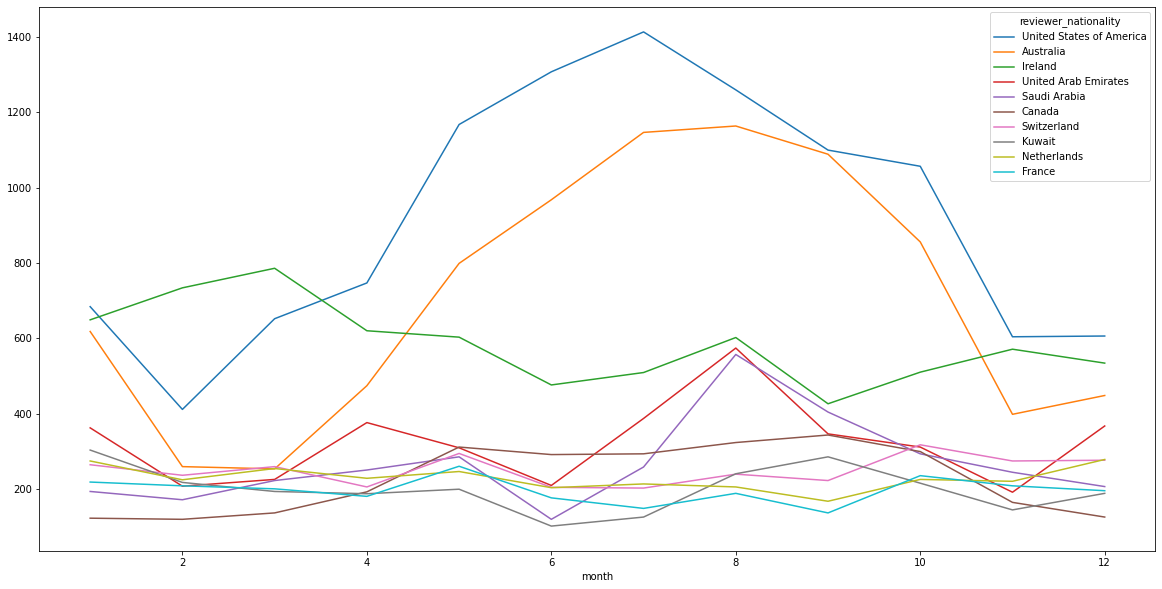

In [89]:
sns.lineplot(x='month',y=top_ten.values,hue='reviewer_nationality',data=top_ten)

In [90]:
london.head(1)

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country_x,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma,district,country_y,sub_region,continent
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened therefore i could not access the facilities Finaly the receptionist fid not clarify that i would unable to move my car and did not stamp my car parking so i can come in and out Therefore i had to pay 50 for one day,first day swimming pool opened therefore could access facilities finaly receptionist fid clarify would unable move car stamp car parking come therefore pay 50 one day,first day swim pool open therefor could access facil finali receptionist fid clarifi would unabl move car stamp car park come therefor pay 50 one day,first day swimming pool opened therefore could access facility finaly receptionist fid clarify would unable move car stamp car parking come therefore pay 50 one day,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible,W,NaN,NaN,NaN


- Party Size? 

<AxesSubplot:xlabel='month'>

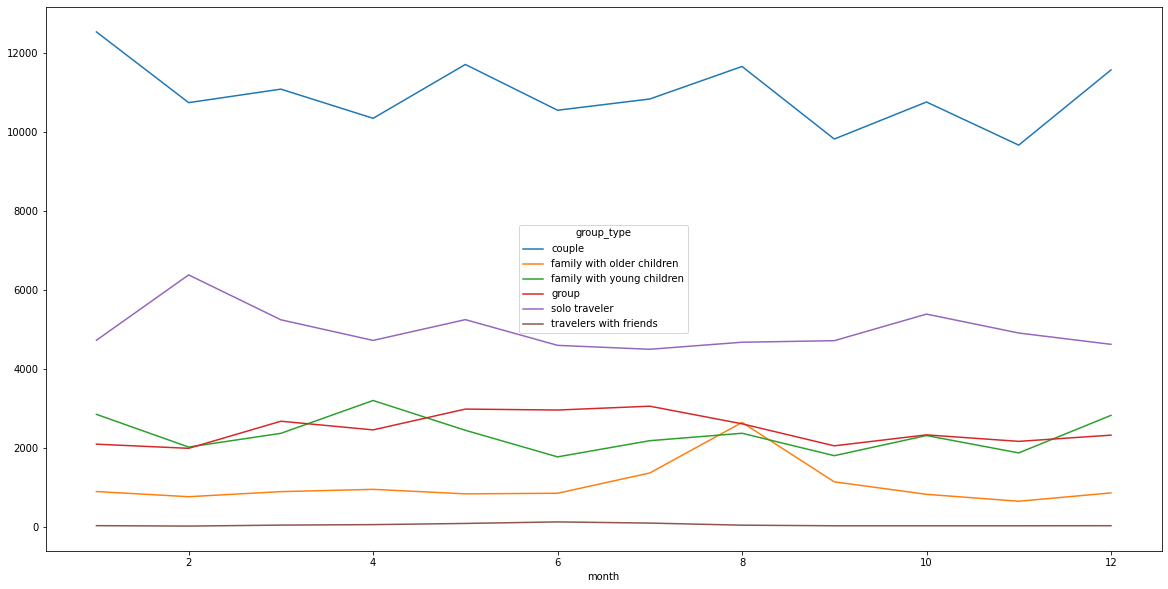

In [91]:
group_month = london.groupby(['month','group_type']).group_type.size()
sns.lineplot(x = 'month',y=group_month.values,hue='group_type', data=group_month)

- Length of stay?

<AxesSubplot:xlabel='month'>

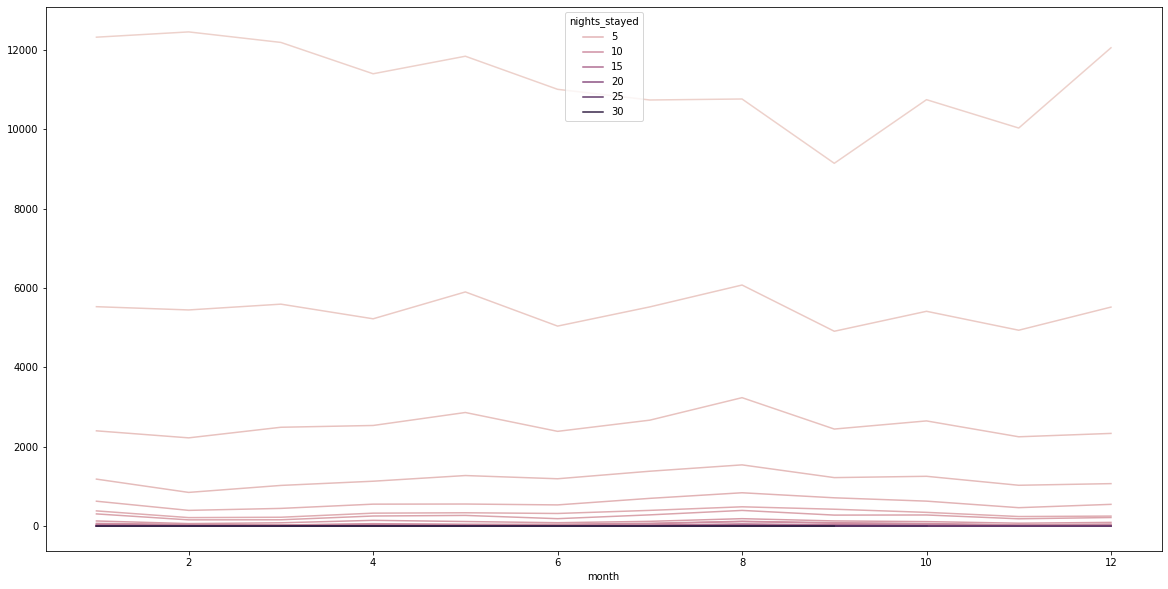

In [92]:
nights = london.groupby(['month','nights_stayed']).nights_stayed.size()
sns.lineplot(x='month',y=nights.values,hue='nights_stayed',data=nights)

In [93]:
london.continent.value_counts(dropna=False)

NaN              174468
Europe            35549
Asia              23450
North America     14360
Oceania           10019
Africa             3519
South America       935
Antarctica            1
Name: continent, dtype: int64

In [94]:
london[['continent','reviewer_nationality']][london.continent.isnull()].value_counts(dropna=False)

continent  reviewer_nationality     
NaN        United Kingdom               170649
           Hong Kong                      1365
           Russia                          794
           Czech Republic                  464
           South Korea                     267
           Taiwan                          264
                                           258
           Abkhazia Georgia                 66
           Brunei                           56
           Iran                             55
           Vietnam                          54
           Macau                            42
           Tanzania                         21
           Macedonia                        20
           Kosovo                           12
           Palestinian Territory            10
           Antigua Barbuda                  10
           Venezuela                         9
           Moldova                           7
           Ivory Coast                       6
           Falkland Isl

In [107]:
# hotel[['hotel_name','average_score']].value_counts().sort_index()

# NLP

In [109]:
london.head(1)

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country_x,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma,district,country_y,sub_region,continent
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened therefore i could not access the facilities Finaly the receptionist fid not clarify that i would unable to move my car and did not stamp my car parking so i can come in and out Therefore i had to pay 50 for one day,first day swimming pool opened therefore could access facilities finaly receptionist fid clarify would unable move car stamp car parking come therefore pay 50 one day,first day swim pool open therefor could access facil finali receptionist fid clarifi would unabl move car stamp car park come therefor pay 50 one day,first day swimming pool opened therefore could access facility finaly receptionist fid clarify would unable move car stamp car parking come therefore pay 50 one day,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible,W,NaN,NaN,NaN


## Topic Modeling

In [ ]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])